# Envi

In [84]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Load Data
dataset = pd.read_csv("../Apple462.csv")
dataset

# Split data from region and drop the unused data
netherlands_dataset = dataset[dataset['region'] == 'Netherland']
netherlands_dataset.drop(['Unnamed: 0', 'Fuji', 'Gala'], axis=1, inplace=True)


netherlands_dataset # Show dataframe

C:\Users\maiwi\AppData\Local\Temp\ipykernel_8332\2473299997.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netherlands_dataset.drop(['Unnamed: 0', 'Fuji', 'Gala'], axis=1, inplace=True)


,Date,Envi,region
884,27/12/2015,389773.0,Netherland
885,20/12/2015,382444.0,Netherland
886,13/12/2015,412188.0,Netherland
887,6/12/2015,368529.0,Netherland
888,29/11/2015,391617.0,Netherland
...,...,...,...
3508,4/2/2018,952747.0,Netherland
3509,28/1/2018,832419.0,Netherland
3510,21/1/2018,651433.0,Netherland
3511,14/1/2018,548774.0,Netherland


In [85]:
netherlands_dataset.count() # see df count to check misvalue

Date      169
Envi      165
region    169
dtype: int64

## Fill the average value to misvalue in dataframe

In [87]:
# average envi
avg_Envi = math.ceil(netherlands_dataset['Envi'].sum() / len(netherlands_dataset['Envi']))

print(f"Average Envi: {avg_Envi}")

# add avg in miss value
netherlands_dataset['Envi'].fillna(avg_Envi, inplace=True)

netherlands_dataset.count()

Average Envi: 568029


C:\Users\maiwi\AppData\Local\Temp\ipykernel_8332\684362935.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netherlands_dataset['Envi'].fillna(avg_Envi, inplace=True)


Date      169
Envi      169
region    169
dtype: int64

In [88]:
netherlands_dataset

,Date,Envi,region
884,27/12/2015,389773.0,Netherland
885,20/12/2015,382444.0,Netherland
886,13/12/2015,412188.0,Netherland
887,6/12/2015,368529.0,Netherland
888,29/11/2015,391617.0,Netherland
...,...,...,...
3508,4/2/2018,952747.0,Netherland
3509,28/1/2018,832419.0,Netherland
3510,21/1/2018,651433.0,Netherland
3511,14/1/2018,548774.0,Netherland


## Graph 

Show the graph after sorted by 'Date'

In [89]:
netherlands_dataset['Date'] = pd.to_datetime(netherlands_dataset['Date']) # transform date format d/m/y to y-m-d for using sort function
netherlands_dataset = netherlands_dataset.sort_values(by='Date') # sort by date

netherlands_dataset


C:\Users\maiwi\AppData\Local\Temp\ipykernel_8332\2499204772.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  netherlands_dataset['Date'] = pd.to_datetime(netherlands_dataset['Date']) # transform date format d/m/y to y-m-d for using sort function
C:\Users\maiwi\AppData\Local\Temp\ipykernel_8332\2499204772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netherlands_dataset['Date'] = pd.to_datetime(netherlands_dataset['Date']) # transform date format d/m/y to y-m-d for using sort function


,Date,Envi,region
935,2015-01-04,506427.0,Netherland
934,2015-01-11,463273.0,Netherland
933,2015-01-18,458532.0,Netherland
932,2015-01-25,549415.0,Netherland
931,2015-02-01,540024.0,Netherland
...,...,...,...
3505,2018-02-25,855571.0,Netherland
3504,2018-03-04,701418.0,Netherland
3503,2018-03-11,614152.0,Netherland
3502,2018-03-18,630826.0,Netherland


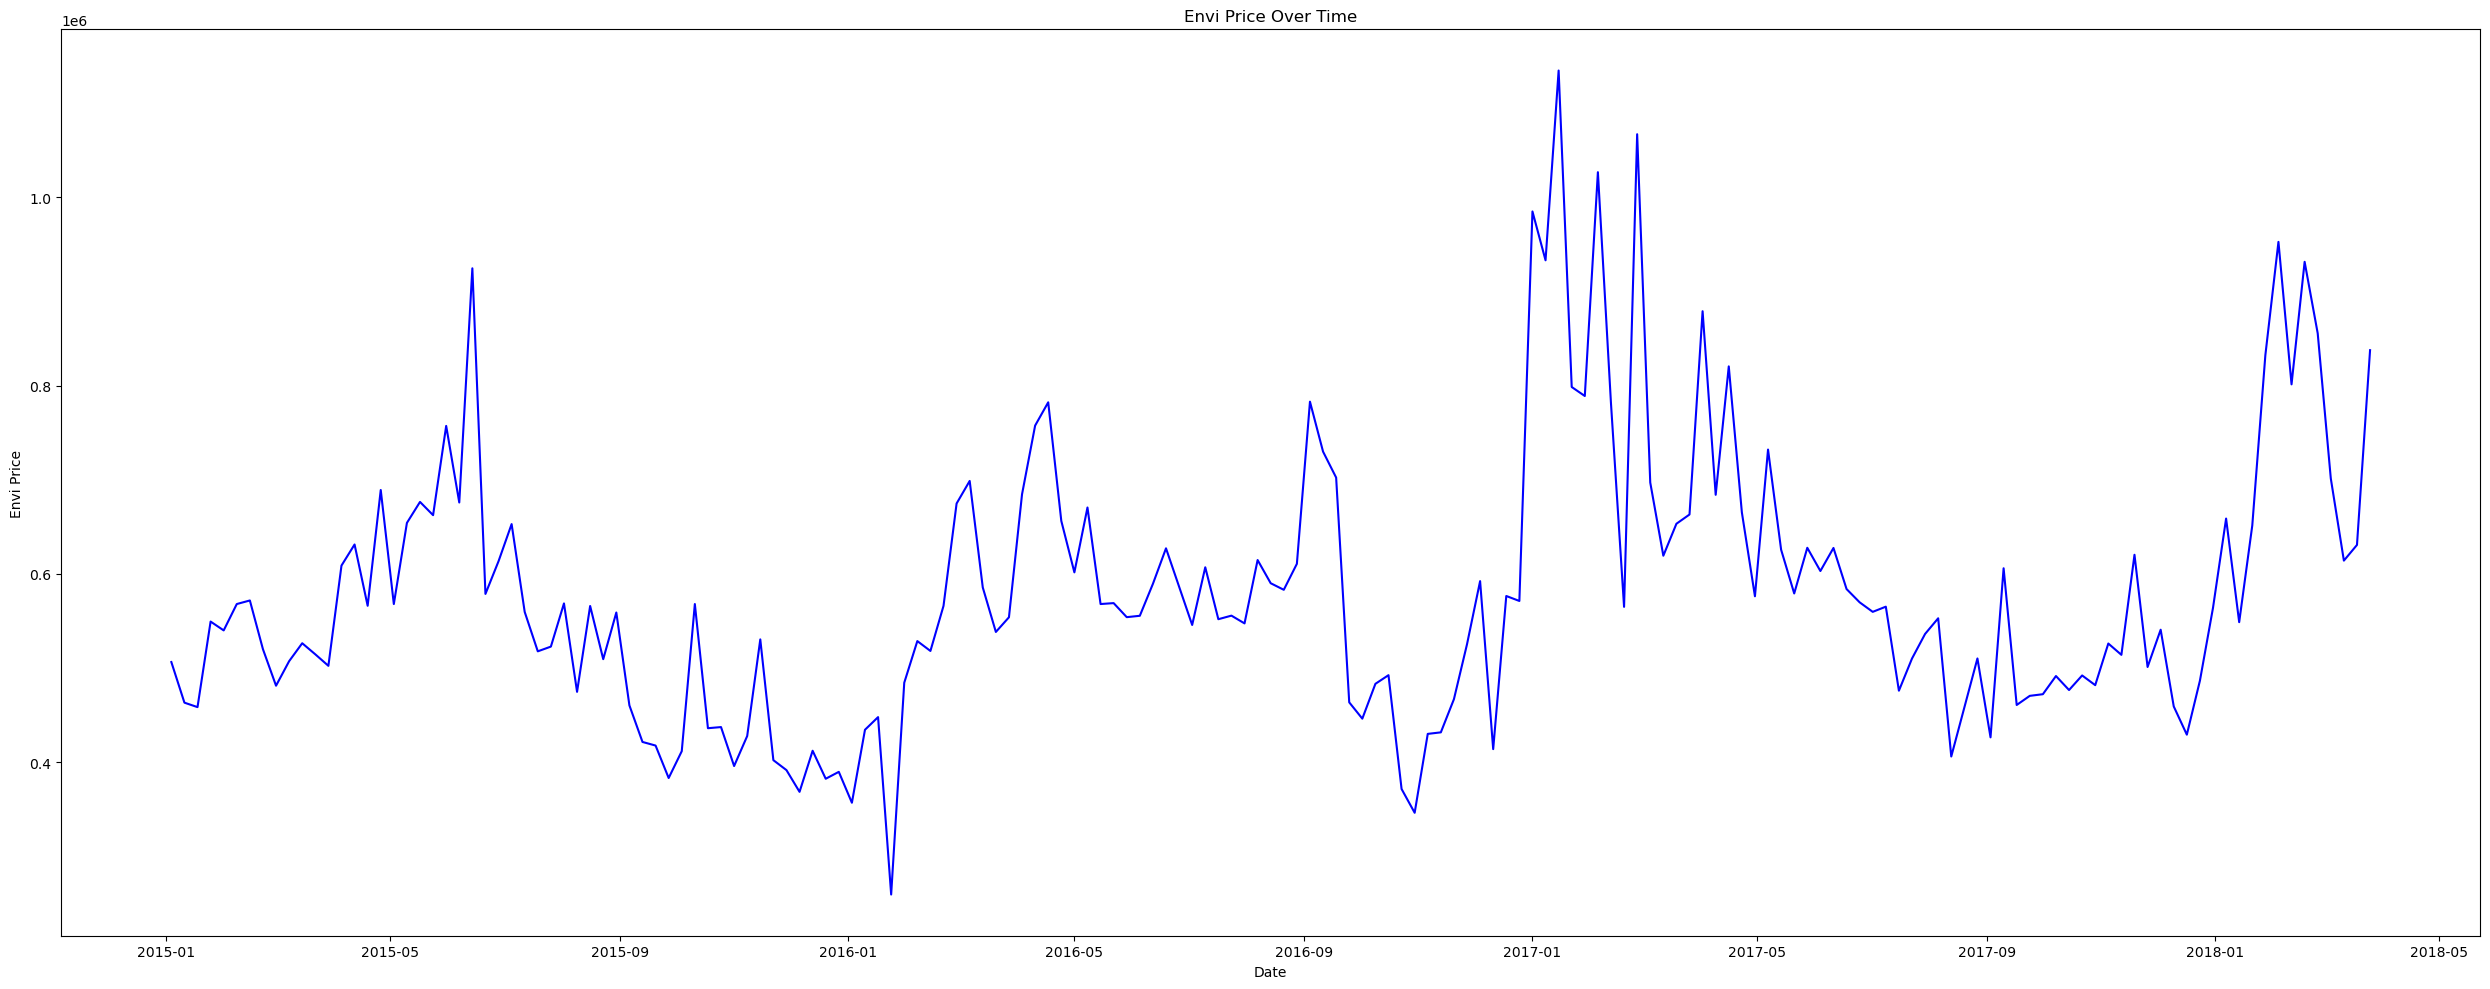

In [90]:
# graph size
plt.figure(figsize=(25, 10))
plt.plot(netherlands_dataset['Date'], netherlands_dataset['Envi'], color='b')

plt.xlabel('Date')

plt.ylabel('Envi Price')
# plt.yscale('log') # set log scale

plt.title('Envi Price Over Time')
# plt.xticks(rotation=90, fontsize=10) 
plt.tight_layout()

plt.show()

## Scale 

Use StandardScaler from sklearn to scale down the 'Envi' feature

In [91]:
# # scale
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(netherlands_dataset[['Envi']])
# netherlands_dataset['Envi'] = scaled_data

# netherlands_dataset

## Create new feature 

We make the function date_split to split 1 feature to get the 3 feature  
* year
* month
* day

and get_season function to make the season

In [92]:
# function สำหรับสร้าง feature เพิ่ม (year, month, day)

def date_split(data):
    data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
    data['year'] = data['Date'].dt.year
    data['month'] = data['Date'].dt.month   
    data['day'] = data['Date'].dt.day

date_split(netherlands_dataset)


def get_season(day, month):
    if (month == 3 and day >= 21) or month in range(4, 6) or (month == 6 and day < 21):
        return 'Spring'
    elif (month == 6 and day >= 21) or month in range(7, 9) or (month == 9 and day < 21):
        return 'Summer'
    elif (month == 9 and day >= 21) or month in range(10, 12) or (month == 12 and day < 21):
        return 'Autumn'
    else:
        return 'Winter'

netherlands_dataset['season'] = netherlands_dataset.apply(lambda x: get_season(x['day'], x['month']), axis=1)

season_mapping = {'Spring': 0, 'Summer': 1, 'Autumn': 2, 'Winter': 3}
netherlands_dataset['season'] = netherlands_dataset['season'].map(season_mapping)



df = netherlands_dataset.set_index('Date') # set 'Date' to id because it unique

# plt.figure(figsize=(25, 10))
# plt.scatter(df.index, df['Envi'], alpha=1, s=4, color='b')
# plt.xlabel('Date')

# plt.ylabel('Envi Price')
# plt.yscale('log')

# plt.title('Envi Price Over Time')
# plt.show()


### This is the df after prepare and it ready to train the model

In [93]:
df

,Envi,region,year,month,day,season
Date,,,,,,
2015-01-04,506427.0,Netherland,2015,1,4,3
2015-01-11,463273.0,Netherland,2015,1,11,3
2015-01-18,458532.0,Netherland,2015,1,18,3
2015-01-25,549415.0,Netherland,2015,1,25,3
2015-02-01,540024.0,Netherland,2015,2,1,3
...,...,...,...,...,...,...
2018-02-25,855571.0,Netherland,2018,2,25,3
2018-03-04,701418.0,Netherland,2018,3,4,3
2018-03-11,614152.0,Netherland,2018,3,11,3


## For case user time step 

The Envi_x1 gets the next label of the next sample, you can uncomment below if you want to test 

In [94]:
# df['Envi_x1'] = df['Envi'].shift(-1, fill_value=0)
# df['Envi_x2'] = df['Envi'].shift(-2, fill_value=0)
# df['Envi_x3'] = df['Envi'].shift(-3, fill_value=0)
# df['Envi_x4'] = df['Envi'].shift(-4, fill_value=0)
# df['Envi_x5'] = df['Envi'].shift(-5, fill_value=0)
# df['Envi_x6'] = df['Envi'].shift(-6, fill_value=0)
# df['Envi_x7'] = df['Envi'].shift(-7, fill_value=0)
# df['Envi_x8'] = df['Envi'].shift(-8, fill_value=0)

# df.drop(df.tail(8).index, inplace=True)

# df

## Set seed_value 

In [95]:
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)

## Train and Test Model

In [96]:
# Algorithm
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

# Loss Function
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


df.drop(['region'], axis=1, inplace=True)

df['Date_ordinal'] = df.index.to_series().apply(lambda x: x.toordinal())

train, test = train_test_split(df, test_size=0.15)


X_train = train.drop(['Envi'], axis=1)
y_train = train['Envi']

X_test = test.drop(['Envi'], axis=1)
y_test = test['Envi']

# Test Algorithm 
# dt_reg = DecisionTreeRegressor()
# dt_reg = LinearRegression()
# dt_reg = SVR()
dt_reg = GradientBoostingRegressor() # best
# dt_reg = MLPRegressor()
# dt_reg = RandomForestRegressor()

dt_reg.fit(X_train, y_train)


dt_pred = dt_reg.predict(X_test)

test['Envi_Predicted'] = dt_pred

# Show performance
MSE = mean_squared_error(y_test, dt_pred)
print(f'Mean Squared Error: {MSE}')

MAE = mean_absolute_error(y_test, dt_pred)
print(f'Mean Absolute Error: {MAE}')

R2 = r2_score(y_test, dt_pred)
print(f'R2 Score: {MAE}')


Mean Squared Error: 5525958883.9173565
Mean Absolute Error: 53175.72170756418
R2 Score: 53175.72170756418


In [97]:
test

,Envi,year,month,day,season,Date_ordinal,Envi_Predicted
Date,,,,,,,
2017-08-27,510227.0,2017,8,27,1,736568,486292.463312
2015-08-02,568695.0,2015,8,2,1,735812,541628.827381
2017-04-16,820487.0,2017,4,16,0,736435,698229.715363
2015-07-26,522820.0,2015,7,26,1,735805,536714.357209
2017-10-01,472252.0,2017,10,1,2,736603,495800.518023
2018-02-11,801391.0,2018,2,11,3,736736,917354.163336
2018-03-04,701418.0,2018,3,4,3,736757,707070.466984
2015-12-27,389773.0,2015,12,27,3,735959,399413.011031
2017-01-08,933182.0,2017,1,8,3,736337,963234.464181


## Graph after training

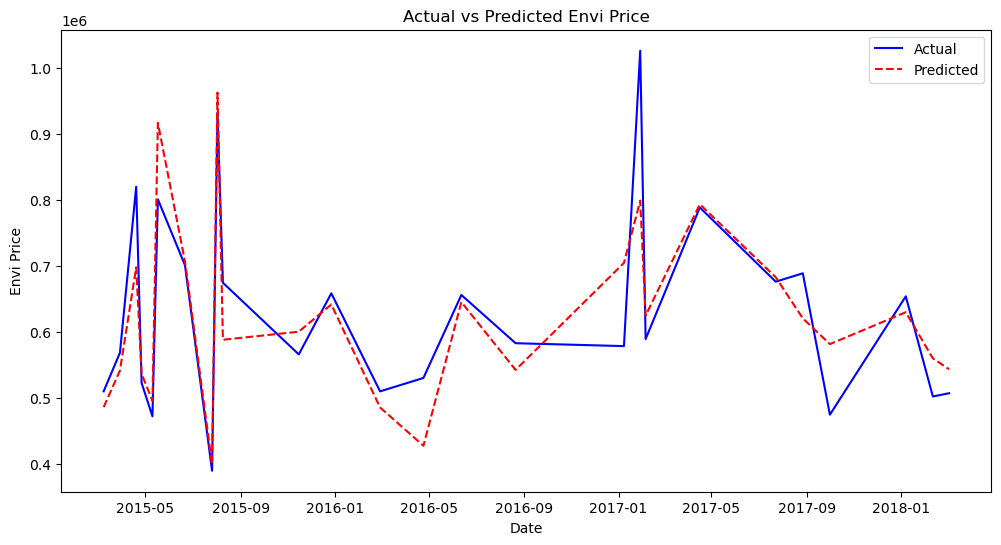

In [98]:
test = test.sort_values(by='Date')

plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label='Actual', color='blue')
plt.plot(test.index, dt_pred, label='Predicted', color='red', linestyle='--')
plt.xlabel('Date')
# plt.yscale('log')
plt.ylabel('Envi Price')
plt.title('Actual vs Predicted Envi Price')
plt.legend()
plt.show()


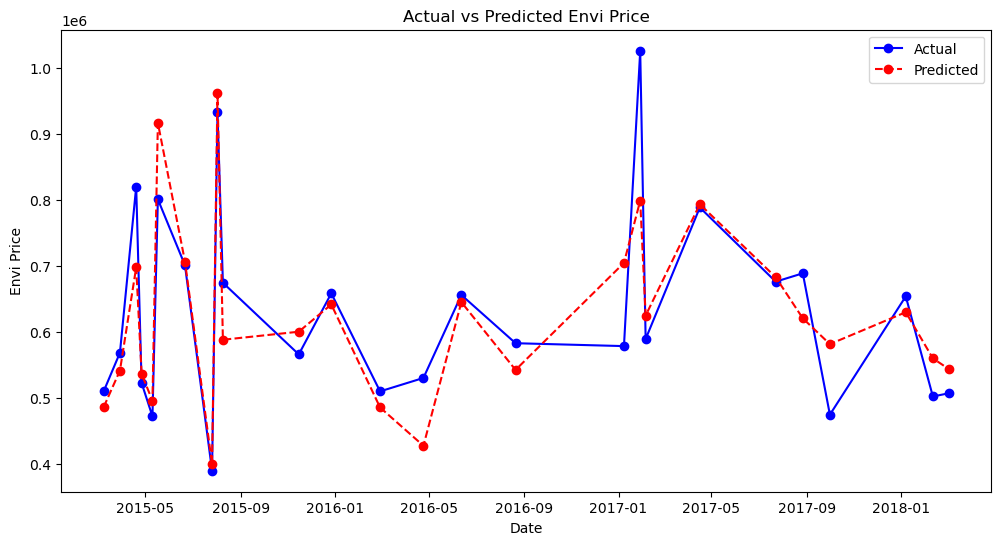

In [99]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label='Actual', color='blue', marker='o')
plt.plot(test.index, dt_pred, label='Predicted', color='red', linestyle='--', marker='o')
plt.xlabel('Date')
plt.ylabel('Envi Price')
plt.title('Actual vs Predicted Envi Price')
plt.legend()
plt.show()



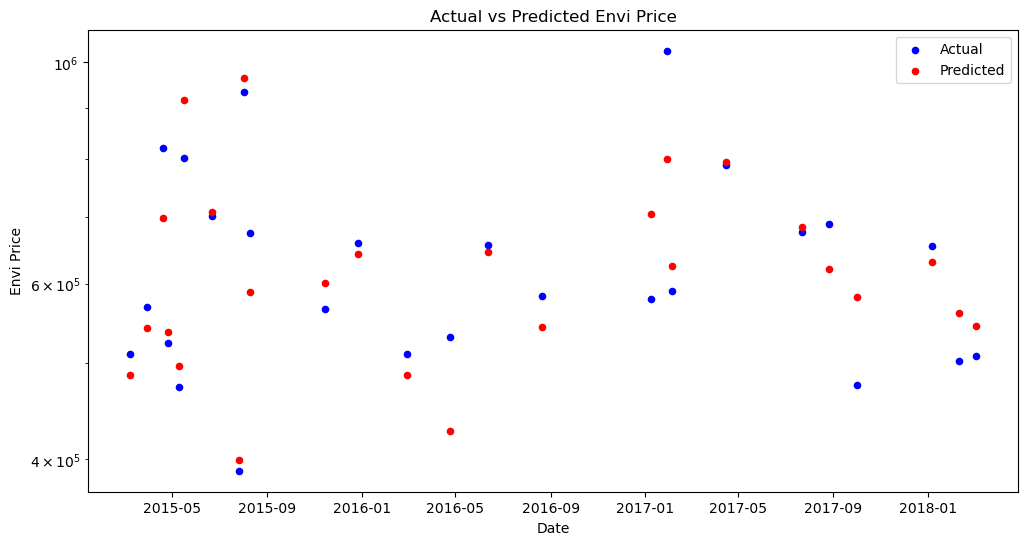

In [100]:
plt.figure(figsize=(12, 6))
plt.scatter(test.index, y_test, label='Actual', color='blue', s=20) 
plt.scatter(test.index, dt_pred, label='Predicted', color='red', s=20)  
plt.xlabel('Date')
plt.ylabel('Envi Price')
plt.yscale('log')
plt.title('Actual vs Predicted Envi Price')
plt.legend()
plt.show()


In [101]:
feature_importance = dt_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
for idx in sorted_idx:
    print(f'Feature: {X_train.columns[idx]}, Importance: {feature_importance[idx]}')


Feature: Date_ordinal, Importance: 0.40227541019344715
Feature: month, Importance: 0.37077570264974463
Feature: year, Importance: 0.11625727294749938
Feature: season, Importance: 0.06347315754471056
Feature: day, Importance: 0.04721845666459845


In [104]:
df_pred = dt_reg.predict(df.drop(['Envi'], axis=1))
df['Envi_pred'] = df_pred
df.drop(['year', 'month', 'day', 'season', 'Date_ordinal'], axis=1, inplace=True)
df

,Envi,Envi_pred
Date,,
2015-01-04,506427.0,506411.851661
2015-01-11,463273.0,479315.534994
2015-01-18,458532.0,476044.809273
2015-01-25,549415.0,528884.253586
2015-02-01,540024.0,525899.410582
...,...,...
2018-02-25,855571.0,855504.794081
2018-03-04,701418.0,707070.466984
2018-03-11,614152.0,628641.778666
